In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')

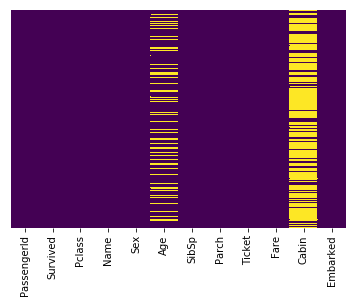

In [97]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
df.drop(['Cabin','PassengerId'],axis=1,inplace=True)

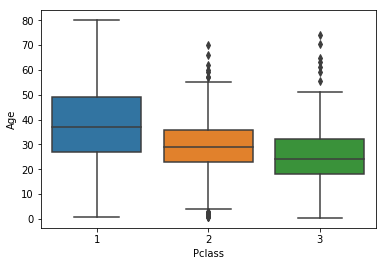

In [99]:
sns.boxplot(x='Pclass',y='Age',data=df)

In [100]:
df.groupby('Pclass')['Fare'].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [101]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [5]:
def imputing_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass ==2:
            return 30
        elif pclass ==3:
            return 25
    else:
        return age

In [6]:
df['Age'] = df[['Age','Pclass']].apply(imputing_age, axis =1)

In [8]:
df = pd.get_dummies(df, columns = ['Sex','Embarked'], drop_first = True)

In [141]:
title = df['Name'].apply(lambda x: x.split()[1])

In [142]:
df['title'] = title

In [145]:
df = pd.get_dummies(df, columns = ['title'], drop_first = True)
df.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,...,"title_Pelsmaeker,","title_Planke,",title_Rev.,"title_Shawah,","title_Steen,","title_Velde,","title_Walle,",title_der,title_the,title_y
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X = df.drop(['Name','Ticket','Survived'], axis =1)
y = df['Survived']

In [9]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [14]:
from sklearn.model_selection import cross_val_score

In [31]:
cross_val_score(lr, X_train, y_train, cv=5)

array([ 0.76190476,  0.904     ,  0.75806452,  0.74193548,  0.83064516])

In [16]:
test_df = pd.read_csv('test.csv')

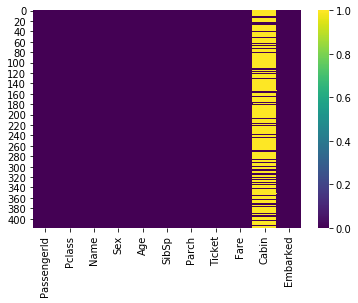

In [22]:
sns.heatmap(test_df.isnull(),cmap='viridis')

In [21]:
test_df['Age'] = test_df[['Age','Pclass']].apply(imputing_age, axis=1)

In [24]:
test_df = pd.get_dummies(test_df, columns = ['Sex','Embarked'], drop_first = True)

In [27]:
X_final = test_df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

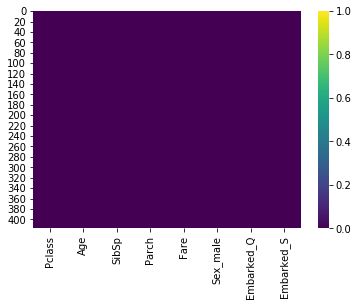

In [50]:
sns.heatmap(X_final.isnull(),cmap='viridis')

In [54]:
X_final.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [52]:
def imputing_fare(cols):
    fare = cols[0]
    pclass = cols[1]
    
    if pd.isnull(fare):
        if pclass == 1:
            return 84.15
        elif pclass ==2:
            return 20.66
        elif pclass ==3:
            return 13.67
    else:
        return fare

In [53]:
X_final['Fare'] = X_final[['Fare','Pclass']].apply(imputing_fare, axis=1)

In [55]:
y_final = lr.predict(X_final)

In [58]:
np.savetxt("pred.csv", y_final, delimiter=",")

In [59]:
gender = pd.read_csv('gender_submission.csv')

In [61]:
gender['Survived'] = y_final

In [64]:
gender.to_csv('pred_lr.csv', index=False)

In [181]:
title = test_df['Name'].apply(lambda x: x.split()[1])

In [183]:
title.value_counts()

Mr.             234
Miss.            77
Mrs.             70
Master.          19
y                 4
Billiard,         2
Col.              2
Rev.              2
Brito,            1
Khalil,           1
Dr.               1
Ms.               1
Palmquist,        1
Carlo,            1
Messemaeker,      1
Planke,           1
Name: Name, dtype: int64

In [174]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S', 'title_Capt.', 'title_Carlo,',
       'title_Col.', 'title_Cruyssen,', 'title_Don.', 'title_Dr.',
       'title_Gordon,', 'title_Impe,', 'title_Jonkheer.', 'title_Major.',
       'title_Master.', 'title_Melkebeke,', 'title_Messemaeker,',
       'title_Miss.', 'title_Mlle.', 'title_Mme.', 'title_Mr.', 'title_Mrs.',
       'title_Ms.', 'title_Mulder,', 'title_Pelsmaeker,', 'title_Planke,',
       'title_Rev.', 'title_Shawah,', 'title_Steen,', 'title_Velde,',
       'title_Walle,', 'title_der', 'title_the', 'title_y'],
      dtype='object')

In [152]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,lr_pred))
print('\n')
print(classification_report(y_test,lr_pred))

[[152  23]
 [ 27  93]]


             precision    recall  f1-score   support

          0       0.85      0.87      0.86       175
          1       0.80      0.78      0.79       120

avg / total       0.83      0.83      0.83       295



In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

In [155]:
print(confusion_matrix(y_test,rf_pred))
print('\n')
print(classification_report(y_test,rf_pred))

[[146  29]
 [ 30  90]]


             precision    recall  f1-score   support

          0       0.83      0.83      0.83       175
          1       0.76      0.75      0.75       120

avg / total       0.80      0.80      0.80       295

